In [240]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

In [241]:
def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [242]:
def logLoss(weights):
    predictions = logisticPrediction(weights, points)
    probs = predictions * targets + (1 - predictions) * (1 - targets)
    return -np.sum(np.log(probs))
    
def logisticPrediction(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def sigmoid(t):
    return 0.5 * (np.tanh(t) + 1)
#     return 1.0/(1.0 + np.exp(-t))

def trainBasicPerceptron():
    weights = np.array([0.0, 0.0, 0.0])
    trainingGradient = grad(logLoss)
    
    print("Initial Loss: ", logLoss(weights))
    for i in range(1, 100):
        weights -= trainingGradient(weights) * 0.01
            
    print("Trained Loss: ", logLoss(weights))    
    print("Weights: ", weights)
    return weights
    
    

In [255]:
def trainBoundarySeekerPerceptron():
    # Start at the origin with gradient 0 
    weights = np.array([0.0, 0.0, 0.0])
    trainingGradient = grad(localLogLoss)
    
    print("Initial Loss: ", localLogLoss(weights))
    for i in range(1, 100):
        weights -= trainingGradient(weights) * 0.01
            
    print("Trained Loss: ", localLogLoss(weights))    
    print("Weights: ", weights)
    return weights
    
def pgLogisticPrediction(weights, inputs):
    ins = np.array(list(map(lambda x: predict(weights, x), inputs)))
    return sigmoid(ins)
    
def predict(weights, i):
    return -1 * weights[0] * (weights[1] - i[1]) - weights[2] - i[2]
    
def localLogLoss(weights):
    i = list(filter(lambda e: (points[e][1] - weights[1])**2 + (points[e][2] - weights[2])**2 <= 0.4**2, range(0, len(points))))
    
    local = np.array(list(map(lambda x: points[x], i)))
    t = np.array(list(map(lambda x: targets[x], i)))
    
    predictions = pgLogisticPrediction(weights, local)
    probs = predictions * t + (1 - predictions) * (1 - t)
    return -np.sum(np.log(probs))
    

Type 0:  35
Type 1:  65
Training Basic Perceptron
Initial Loss:  69.314718056
Trained Loss:  26.2731743756
Weights:  [ 1.30213782  0.68340515  2.9627996 ]


Training Boundary Hunter Perceptron
Initial Loss:  8.95038792754
Trained Loss:  9.65429866213
Weights:  [ 0.68248632 -0.01431048 -0.04013959]


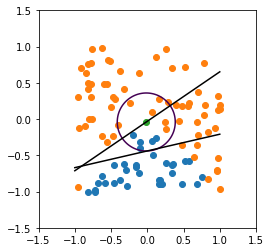

In [256]:

random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

print("Training Basic Perceptron")
basicPerceptronWeights = trainBasicPerceptron()
byas = -1 * basicPerceptronWeights[0]/basicPerceptronWeights[2]
Xcoef = basicPerceptronWeights[1]/basicPerceptronWeights[2]

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')

print("\n\nTraining Boundary Hunter Perceptron")
r1 = 0.25
r2 = 1
modifiedPerceptronWeights = trainBoundarySeekerPerceptron()
plt.scatter(modifiedPerceptronWeights[1], modifiedPerceptronWeights[2])
plt.plot([-1.0, 1.0], [modifiedPerceptronWeights[2] - modifiedPerceptronWeights[0]*(modifiedPerceptronWeights[1] + 1), modifiedPerceptronWeights[2] - modifiedPerceptronWeights[0]*(modifiedPerceptronWeights[1] - 1)], 'k-')

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = (X - modifiedPerceptronWeights[1])**2 + (Y - modifiedPerceptronWeights[2])**2 - 0.4**2
plt.contour(X,Y,F,[0])

plt.gca().set_aspect('equal')

plt.show()

In this situation the perceptron does what we would expect, drawing a line 